<a href="https://colab.research.google.com/github/manixha/MachineLearning/blob/main/Diabetes%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
df = pd.read_csv('diabetes_data_upload.csv')
df.head(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


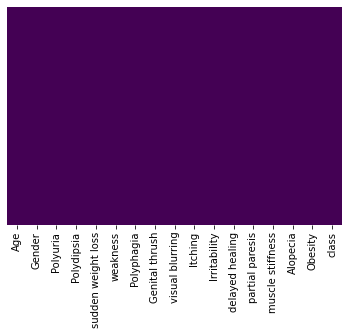

In [ ]:
#checking missing values
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [ ]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)
df['class'].head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [ ]:
# Separating Target feature
X = df.drop(['class'], axis=1)
y = df['class']

In [ ]:
# Storing Features
objectList = X.select_dtypes(include = "object").columns
print(objectList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feature in objectList:
    X[feature] = le.fit_transform(X[feature].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [ ]:
X.head(15)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0


In [ ]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 12345)

In [ ]:
## checking distribution of target variable in train test split
print('Distribution of target variable in training set')
print(y_train.value_counts())

print('Distribution of target variable in test set')
print(y_test.value_counts())

Distribution of target variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of target variable in test set
1    64
0    40
Name: class, dtype: int64


In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

In [ ]:
X_test['Age'].head(15)

223    0.527027
356    0.364865
125    0.527027
14     0.594595
243    0.256757
388    0.364865
502    0.729730
310    0.689189
107    0.418919
414    0.527027
127    0.554054
363    0.702703
102    1.000000
423    0.675676
173    0.635135
Name: Age, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
treemodel = DecisionTreeClassifier()

In [ ]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier()

[Text(0.6209319526627219, 0.95, 'X[2] <= 0.5\ngini = 0.473\nsamples = 416\nvalue = [160, 256]'),
 Text(0.33653846153846156, 0.85, 'X[1] <= 0.5\ngini = 0.428\nsamples = 219\nvalue = [151, 68]'),
 Text(0.15384615384615385, 0.75, 'X[14] <= 0.5\ngini = 0.403\nsamples = 50\nvalue = [14, 36]'),
 Text(0.09467455621301775, 0.65, 'X[0] <= 0.25\ngini = 0.224\nsamples = 39\nvalue = [5, 34]'),
 Text(0.047337278106508875, 0.55, 'X[13] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [4, 5]'),
 Text(0.023668639053254437, 0.45, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.07100591715976332, 0.45, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.14201183431952663, 0.55, 'X[0] <= 0.284\ngini = 0.064\nsamples = 30\nvalue = [1, 29]'),
 Text(0.11834319526627218, 0.45, 'X[10] <= 0.5\ngini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.09467455621301775, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.14201183431952663, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.1656804733727810

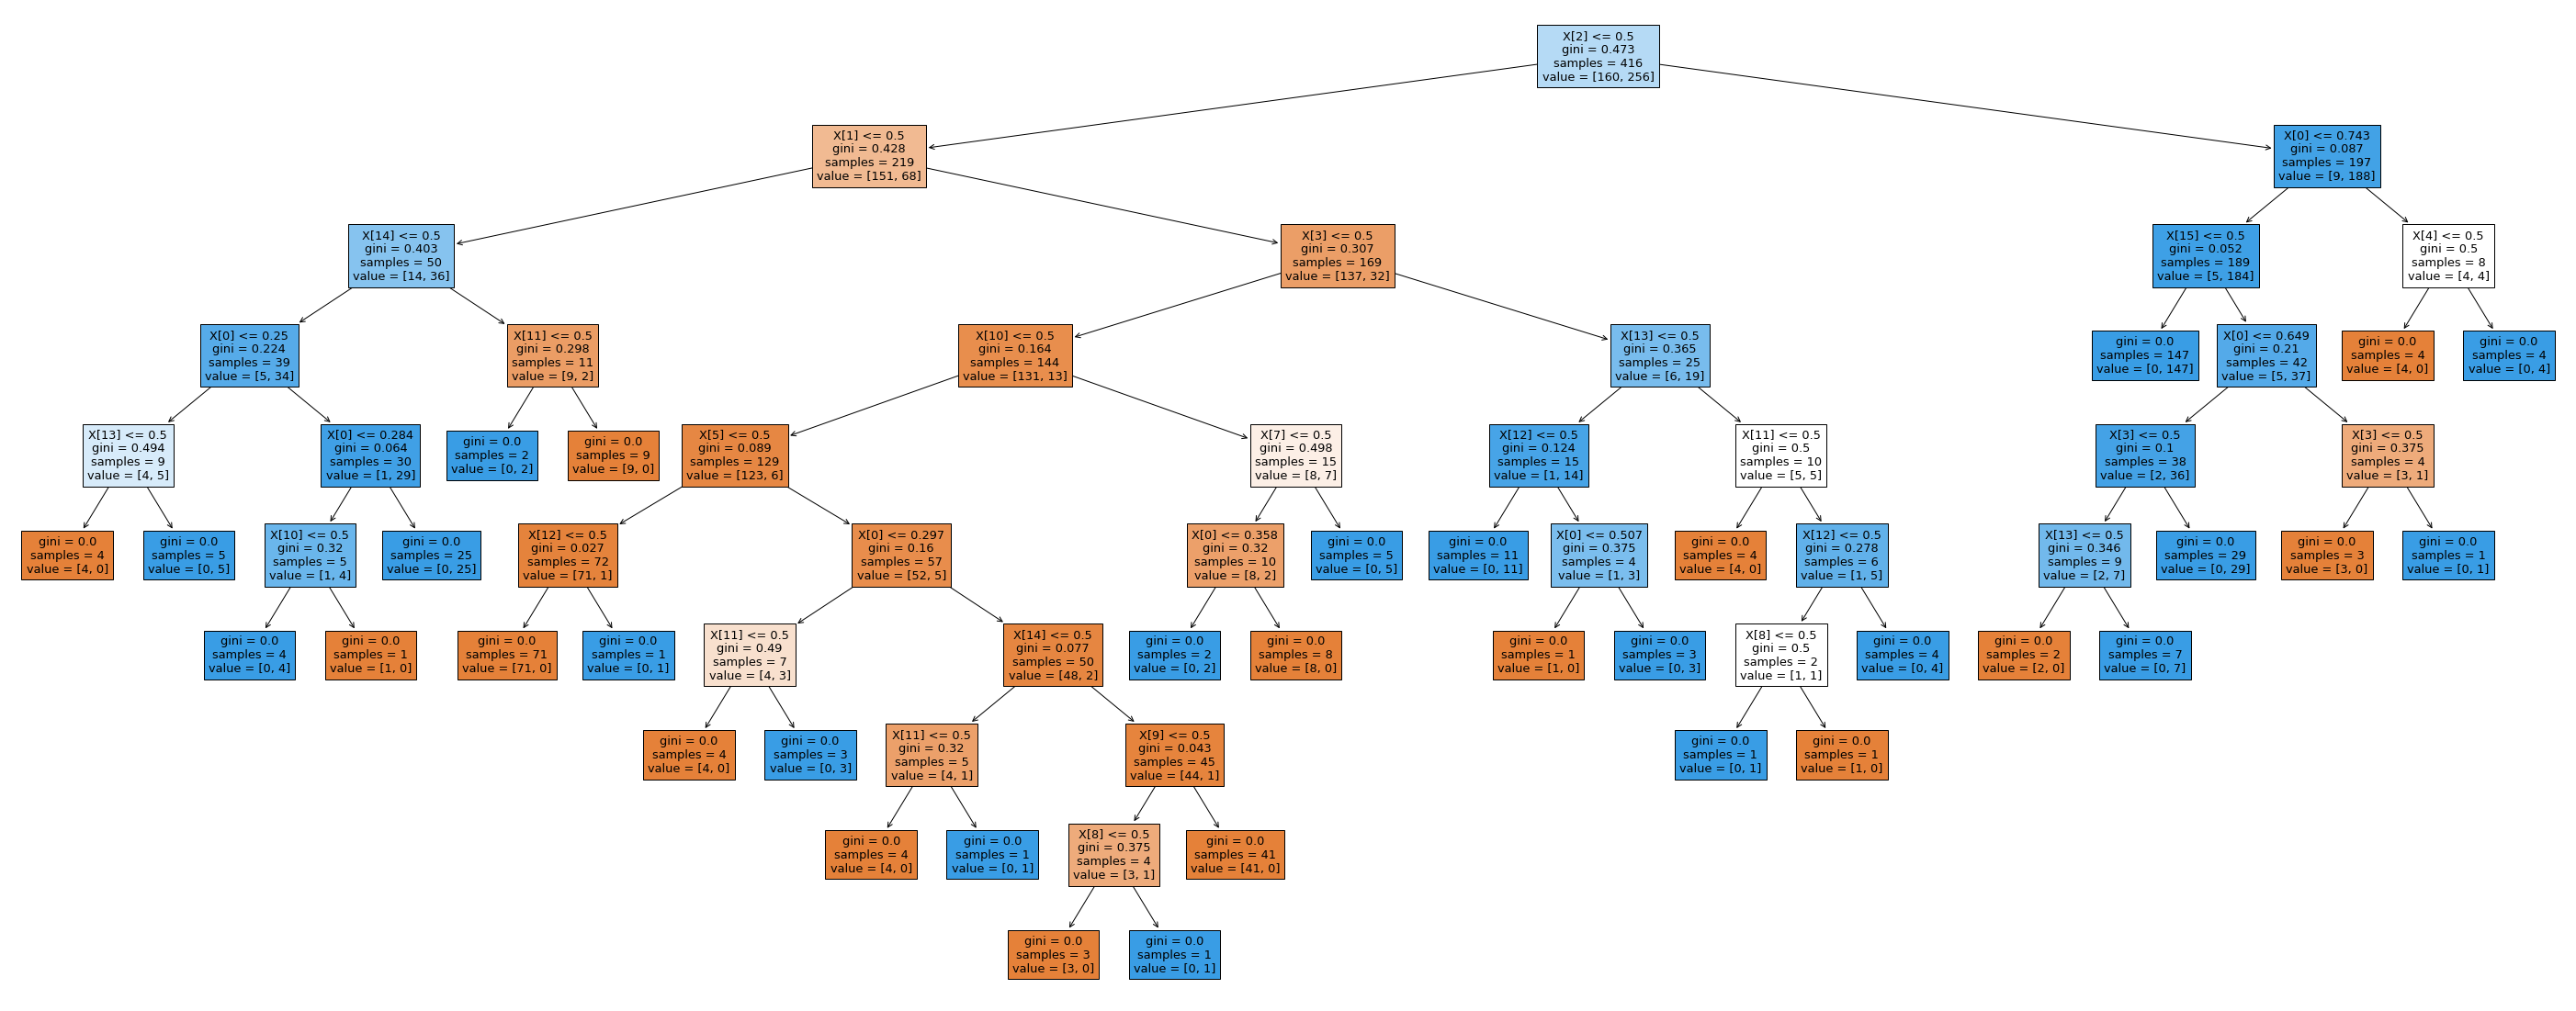

In [ ]:
from sklearn import tree
plt.figure(figsize=(50,20))
tree.plot_tree(treemodel,filled=True)

In [ ]:
y_pred = treemodel.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report

In [ ]:
score = accuracy_score(y_pred,y_test)
score

0.9230769230769231

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        34
           1       0.98      0.90      0.94        70

    accuracy                           0.92       104
   macro avg       0.90      0.94      0.92       104
weighted avg       0.93      0.92      0.92       104



Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators=20,random_state=0)
clf = clf.fit(X,y)

In [ ]:
clf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=209652396),
 DecisionTreeClassifier(max_features='auto', random_state=398764591),
 DecisionTreeClassifier(max_features='auto', random_state=924231285),
 DecisionTreeClassifier(max_features='auto', random_state=1478610112),
 DecisionTreeClassifier(max_features='auto', random_state=441365315),
 DecisionTreeClassifier(max_features='auto', random_state=1537364731),
 DecisionTreeClassifier(max_features='auto', random_state=192771779),
 DecisionTreeClassifier(max_features='auto', random_state=1491434855),
 DecisionTreeClassifier(max_features='auto', random_state=1819583497),
 DecisionTreeClassifier(max_features='auto', random_state=530702035),
 DecisionTreeClassifier(max_features='auto', random_state=626610453),
 DecisionTreeClassifier(max_features='auto', random_state=1650906866),
 DecisionTreeClassifier(max_features='auto', random_state=1879422756),
 DecisionTreeClassifier(max_features='auto', random_state=1277901399),
 DecisionTree

[Text(0.6564903846153847, 0.9642857142857143, 'X[12] <= 0.5\ngini = 0.468\nsamples = 339\nvalue = [194, 326]'),
 Text(0.5072115384615384, 0.8928571428571429, 'X[6] <= 0.5\ngini = 0.492\nsamples = 189\nvalue = [169, 132]'),
 Text(0.3836538461538462, 0.8214285714285714, 'X[8] <= 0.5\ngini = 0.46\nsamples = 130\nvalue = [134, 75]'),
 Text(0.2903846153846154, 0.75, 'X[10] <= 0.5\ngini = 0.388\nsamples = 98\nvalue = [112, 40]'),
 Text(0.22692307692307692, 0.6785714285714286, 'X[9] <= 0.5\ngini = 0.343\nsamples = 88\nvalue = [110, 31]'),
 Text(0.17692307692307693, 0.6071428571428571, 'X[5] <= 0.5\ngini = 0.407\nsamples = 61\nvalue = [68, 27]'),
 Text(0.12307692307692308, 0.5357142857142857, 'X[7] <= 0.5\ngini = 0.23\nsamples = 46\nvalue = [59, 9]'),
 Text(0.09230769230769231, 0.4642857142857143, 'X[2] <= 0.5\ngini = 0.15\nsamples = 41\nvalue = [56, 5]'),
 Text(0.07692307692307693, 0.39285714285714285, 'X[4] <= 0.5\ngini = 0.124\nsamples = 40\nvalue = [56, 4]'),
 Text(0.06153846153846154, 0.3

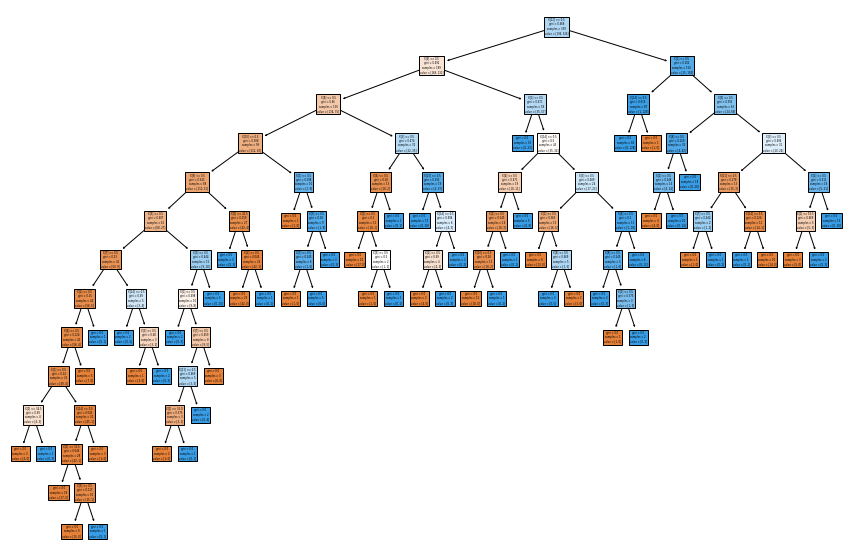

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf.estimators_[2],filled=True)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
score

0.9807692307692307

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        42
           1       0.97      1.00      0.98        62

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score,accuracy_score

In [ ]:
reg = LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'penalty':['l1','l2','elasticnet'],'C':[1,2,3,4,5,10,20,30,40,50],'max_iter':[100,200,300]}

In [ ]:
classifier_regressor = GridSearchCV(reg,param_grid =parameters,scoring= 'accuracy',cv=5)

In [ ]:
classifier_regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
300 fits failed out of a total of 450.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py", line 447, in _check_solver
    raise ValueError(
ValueError: Solve

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [ ]:
classifier_regressor.best_score_

0.9181870338496845

In [ ]:
classifier_regressor.best_params_

{'C': 3, 'max_iter': 100, 'penalty': 'l2'}

In [ ]:
y_pred = classifier_regressor.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
score = accuracy_score(y_pred,y_test)
score

0.9519230769230769

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_pred, y_test)
print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[36  1]
 [ 4 63]]

True Positives(TP) =  36

True Negatives(TN) =  63

False Positives(FP) =  1

False Negatives(FN) =  4


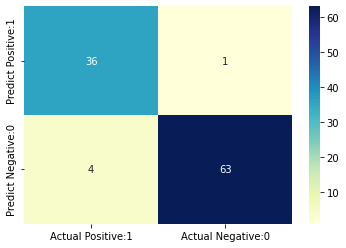

In [ ]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        37
           1       0.98      0.94      0.96        67

    accuracy                           0.95       104
   macro avg       0.94      0.96      0.95       104
weighted avg       0.95      0.95      0.95       104



In [ ]:
y_pred = classifier_regressor.predict([[0.594595,1,	1,	1,	0,	1,	1,	0	,1,	1,	0,	1,	1,	0,	0,	0	]])
y_pred

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])